1. NAMA : Rhesa Binsar Jeremiah Simbolon
2. NIM  : 2109106096
3. KELAS: Informatika B'21
### "POSTTEST 5 KB"

Import library yang dibutuhkan

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

# Unlabelled data metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score # SDB-CH

# Labelled data metrics
from sklearn.metrics import adjusted_rand_score # ARI
from sklearn.metrics import normalized_mutual_info_score # NMI
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score # HCV-M

Baca dataset


In [9]:
df = pd.read_csv('smoking.csv')

Membaca tipe data dari dataset dan menampilkan dat yang ada

In [10]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1704 non-null   int64  
 1   gender                 1704 non-null   object 
 2   age                    1704 non-null   int64  
 3   marital_status         1704 non-null   object 
 4   highest_qualification  1704 non-null   object 
 5   nationality            1704 non-null   object 
 6   ethnicity              1704 non-null   object 
 7   gross_income           1704 non-null   object 
 8   region                 1704 non-null   object 
 9   smoke                  1704 non-null   object 
 10  amt_weekends           421 non-null    float64
 11  amt_weekdays           421 non-null    float64
 12  type                   421 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 173.2+ KB


,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1687,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,No,NaN,NaN,NaN
1700,1688,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Hand-Rolled
1701,1689,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No,NaN,NaN,NaN
1702,1690,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Packets


Data Preprocessing

In [11]:
df.isna().sum()
# Drop kolom yang tidak akan diapakai untuk prediksi
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df["amt_weekends"].fillna(df["amt_weekends"].mode()[0], inplace=True)
df["amt_weekdays"].fillna(df["amt_weekdays"].mode()[0], inplace=True)
df["type"].fillna(df["type"].mode()[0], inplace=True)


# Encode kolom yang kategorikal
min_max_scaler = MinMaxScaler()
df[['age', 'amt_weekends', 'amt_weekdays']] = min_max_scaler.fit_transform(df[['age', 'amt_weekends', 'amt_weekdays']])

col = ['gender', 'marital_status','highest_qualification','nationality', 'ethnicity', 'region', 'type', 'gross_income', 'smoke']
le=LabelEncoder()
for i in col:
    df[i]=le.fit_transform(df[i])
df.head(10)

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,0.271605,0,5,0,6,2,5,0,0.333333,0.363636,3
1,0,0.320988,3,5,0,6,8,5,1,0.200000,0.218182,3
2,1,0.296296,1,1,1,6,4,5,0,0.333333,0.363636,3
3,0,0.296296,1,1,1,6,0,5,0,0.333333,0.363636,3
4,0,0.283951,1,3,0,6,2,5,0,0.333333,0.363636,3
5,0,0.259259,1,3,0,6,1,5,0,0.333333,0.363636,3
6,1,0.456790,1,1,0,6,6,5,1,0.100000,0.109091,3
7,1,0.345679,3,1,1,6,0,5,0,0.333333,0.363636,3
8,1,0.296296,3,2,1,6,2,5,1,0.133333,0.145455,2
9,0,0.308642,1,5,1,6,5,5,1,0.250000,0.218182,3


Menampilkan korelasi antara kolom dengan menggunakan heatmap

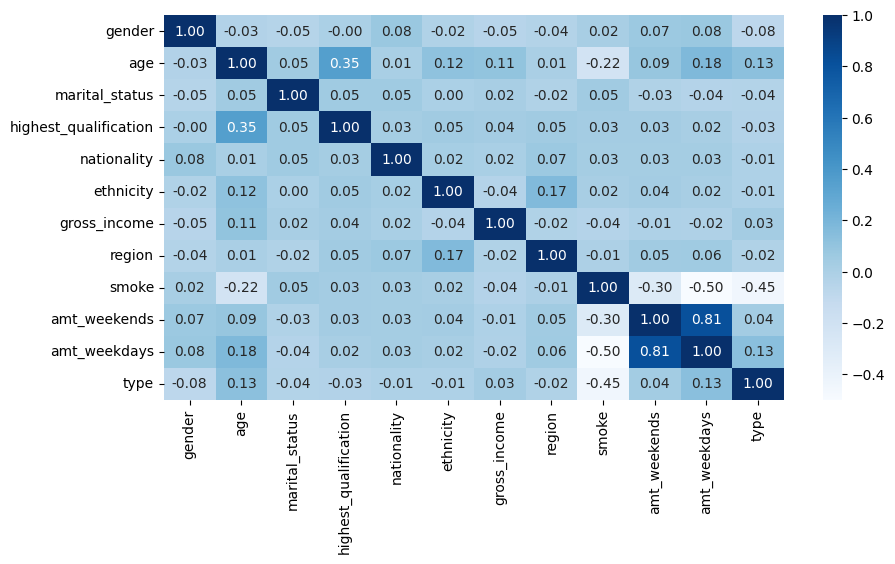

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), cbar=True, annot=True, cmap='Blues', fmt='.2f')
plt.show()

Training data

In [26]:
# Memisahkan atribut dan label
X = df[['amt_weekends', 'amt_weekdays']]
y = df['smoke']

# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Membuat model SVC dan melatihnya dengan data training
svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train, y_train)

# Memprediksi data testing
y_pred = svm.predict(X_test)

# Menyimpan nilai Support Vectors & Indexnya
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

Evaluasi SVC dengan menggunakan confusion matrix

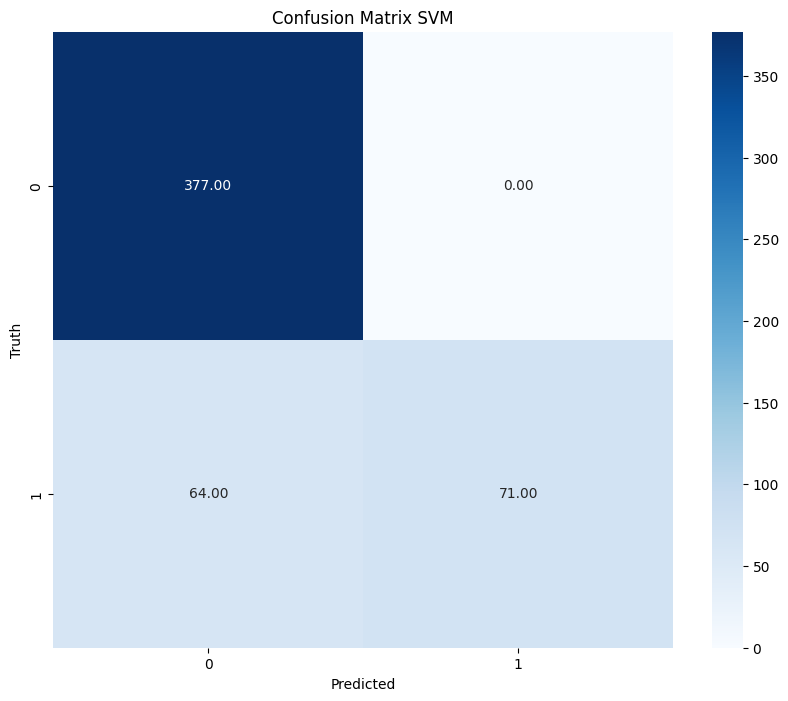

In [16]:
svm_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(svm_cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix SVM')
plt.show()

Menampilkan hasil predict dari SVC menggunakan classification report

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       377
           1       1.00      0.53      0.69       135

    accuracy                           0.88       512
   macro avg       0.93      0.76      0.81       512
weighted avg       0.89      0.88      0.86       512



Plotting data menggunakan Scatter plot


c:\Users\nabil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


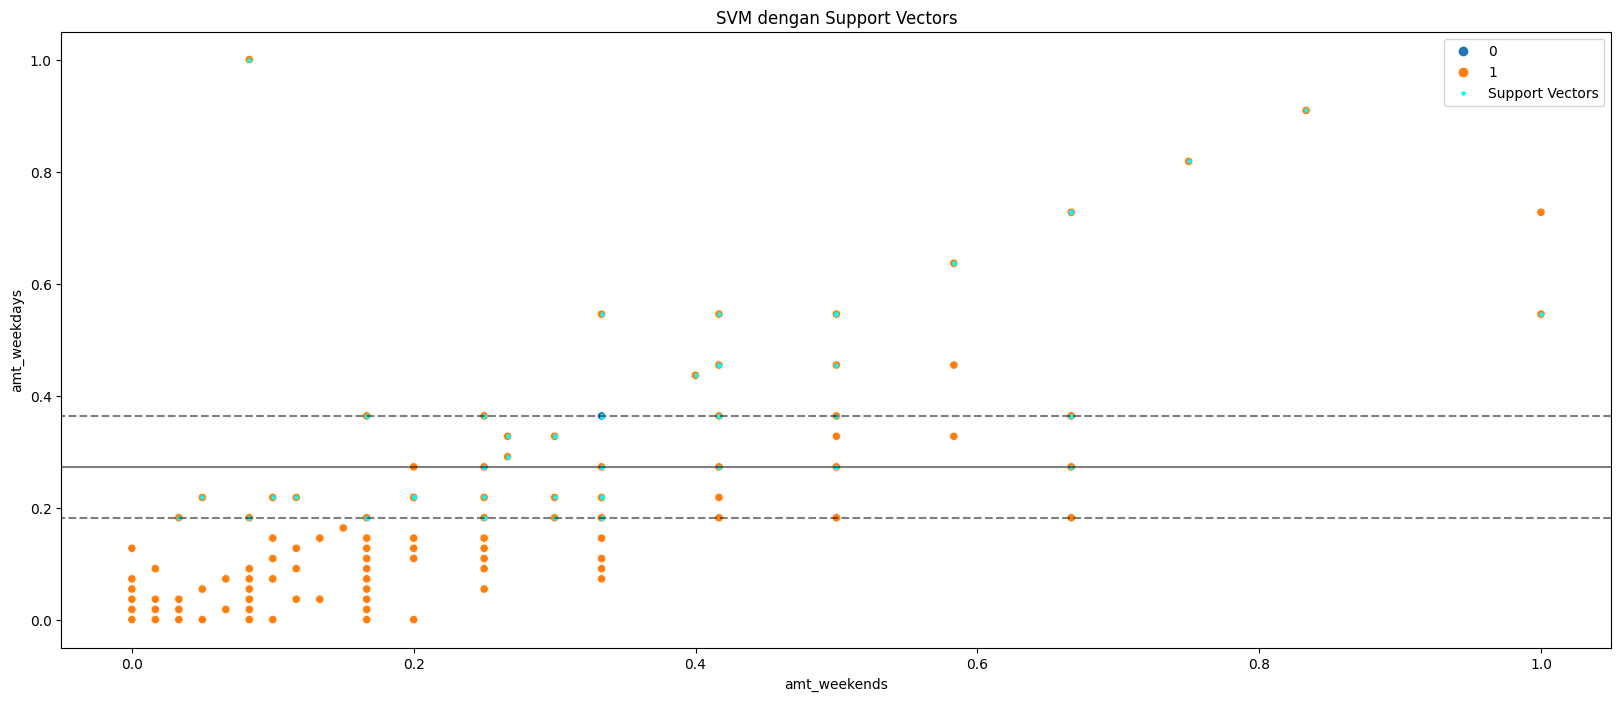

In [18]:
plt.figure(figsize=(20,8))

sns.scatterplot(x='amt_weekends', y='amt_weekdays', data=df, hue='smoke')

# Tampilkan Titik-Titik Support Vectors-nya
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=5, color='cyan', marker='o', label='Support Vectors')

# Buat garis Decision Boundary (Ruang Keputusan)
ax = plt.gca() # gca() = "Get Current Axes"
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Buat sebuah meshgrid untuk evaluasi model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), # Linear Space x
np.linspace(ylim[0], ylim[1])) # Linear Space y
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Concatenate
Z = Z.reshape(xx.shape) # Reshape titik agar sesuai dengan sumbu x

# Buat grafik Decision Boundary dan garis Marginnya
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('amt_weekends')
plt.ylabel('amt_weekdays')
plt.legend(loc='upper right')
plt.title('SVM dengan Support Vectors')
plt.show()

### Unsupervised Learning

B1. K-Means Clustering

In [19]:
X = df[['amt_weekends', 'amt_weekdays']]
K = 2 # Diambil dari jumlah target

kmeans = KMeans(n_clusters=K, n_init=10, init='k-means++', random_state=42) 
kmeans.fit(X)

cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_
cluster_mapping = {1 : 0, 0: 1}
df['cluster'] = df['cluster'].map(cluster_mapping)

Evaluasi tanpa label


In [21]:
# Silhouette Score
ss_score = silhouette_score(X, df['cluster'])
print(f"Silhouette Score: {ss_score:.2f}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(X, df['cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, df['cluster'])
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.85
Davies-Bouldin Index: 0.36
Calinski-Harabasz Index: 2536.80


evaluasi dengan label

In [22]:
# Buat crosstab untuk membandingkan cluster labels dengan true labels
cross_tab = pd.crosstab(df["cluster"], df["smoke"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(df["smoke"], df['cluster'])
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

# Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(df['smoke'], df['cluster'])
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

# Fungsi HCV-M
homogeneity = homogeneity_score(df["smoke"], df['cluster'])
completeness = completeness_score(df["smoke"], df['cluster'])
v_measure = v_measure_score(df["smoke"], df['cluster'])
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
smoke       0    1
cluster           
0           0  192
1        1283  229 

Adjusted Rand Index (ARI): 0.45
Normalized Mutual Information (NMI): 0.40
Homogeneity Score: 0.33
Completeness Score: 0.52
V-Measure Score: 0.40


Plotting menggunakan scatter plot

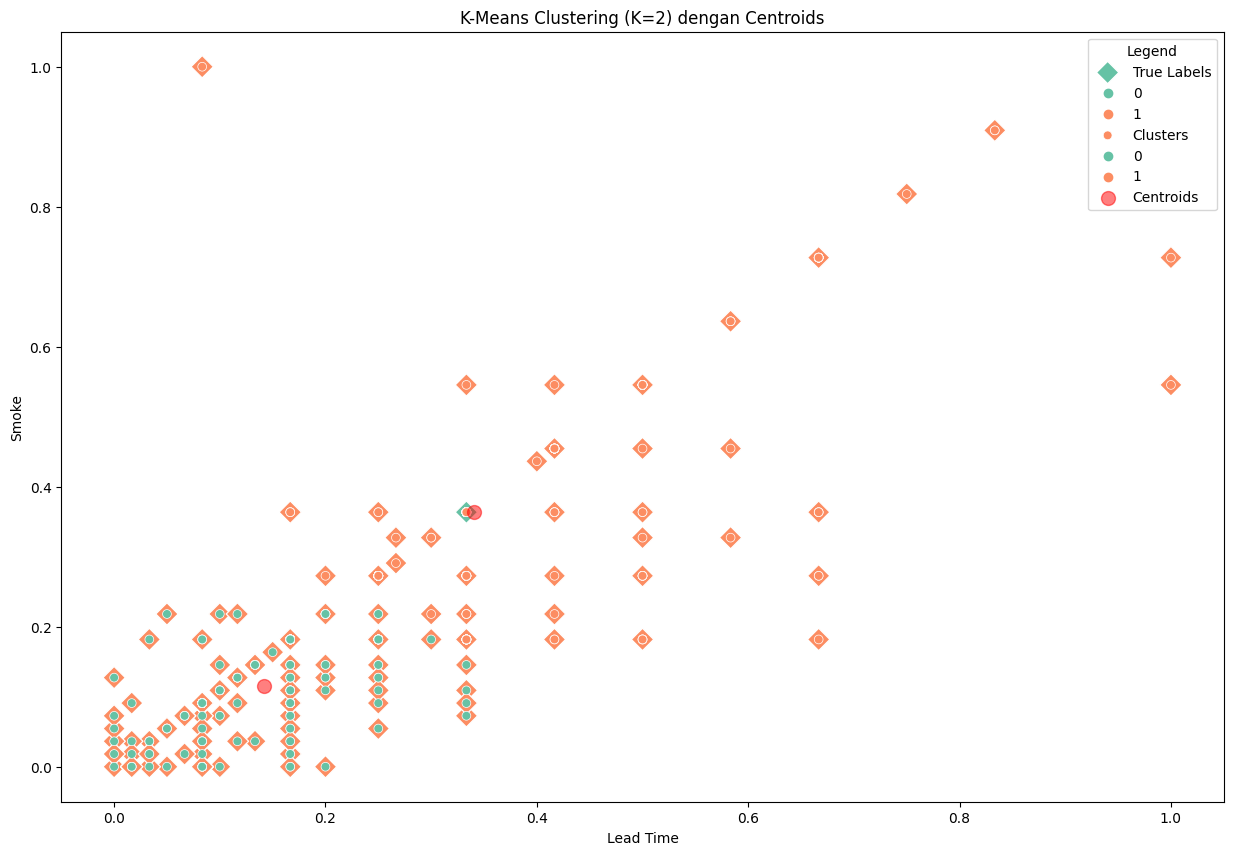

In [24]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="amt_weekends", y="amt_weekdays", hue="smoke", palette='Set2', marker="D", s=130, label="True Labels")
sns.scatterplot(data=df, x="amt_weekends", y="amt_weekdays", hue="cluster", palette='Set2', marker="o", s=40, label="Clusters")
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100, label='Centroids')
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Lead Time")
plt.ylabel("Smoke")
plt.legend(title="Legend", loc="upper right")
plt.show()